# Linear regression

## Libraries and settings

In [36]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_08


## Import the apartment data

In [37]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", 
                      sep=";", 
                      encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(722, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [38]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['area'], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
503    120
6       65
400     90
644     63
484     91
Name: area, dtype: int64 

y_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


#### price per m2 and area

In [39]:
# Create train and test samples for price and area
priceperX_train, priceperX_test, pricepery_train, pricepery_test = train_test_split(df['area'], 
                                                    df['price_per_m2'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(priceperX_train.head(), '\n')

# Show y_train
print('y_train:')
print(pricepery_train.head())

X_train:
503    120
6       65
400     90
644     63
484     91
Name: area, dtype: int64 

y_train:
503    15.83
6      28.46
400    23.22
644    33.37
484    19.78
Name: price_per_m2, dtype: float64


#### price per m2 and rooms

In [40]:
# Create train and test samples for price and area
roomsX_train, roomsX_test, roomsy_train, roomsy_test = train_test_split(df['rooms'], 
                                                    df['price_per_m2'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(roomsX_train.head(), '\n')

# Show y_train
print('y_train:')
print(roomsy_train.head())

X_train:
503    6.5
6      3.5
400    3.5
644    2.5
484    3.5
Name: rooms, dtype: float64 

y_train:
503    15.83
6      28.46
400    23.22
644    33.37
484    19.78
Name: price_per_m2, dtype: float64


### Fit the simple linear regression model

In [41]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            1272.94
Slope of regression line (beta):          13.548
p-value:                                  0.0000
R-squared (coefficient of determination): 0.3678


#### price per m2 and area

In [42]:
# Fit the regression model for price per m2 and area
priceperslope, priceperintercept, priceperr, priceperp, priceperstd_err = stats.linregress(priceperX_train, pricepery_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {priceperintercept:.2f}')
print(f'Slope of regression line (beta):          {priceperslope:.3f}')
print(f'p-value:                                  {priceperp:.4f}')
print(f'R-squared (coefficient of determination): {priceperr**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            51.24
Slope of regression line (beta):          -0.227
p-value:                                  0.0000
R-squared (coefficient of determination): 0.3551


R squared value is smaller for the price per m2 and area.

#### price per m2 and rooms

In [43]:
# Fit the regression model for price per m2 and area
roomsslope, roomsintercept, roomsr, roomsp, roomsstd_err = stats.linregress(roomsX_train, roomsy_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {roomsintercept:.2f}')
print(f'Slope of regression line (beta):          {roomsslope:.3f}')
print(f'p-value:                                  {roomsp:.4f}')
print(f'R-squared (coefficient of determination): {roomsr**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            52.96
Slope of regression line (beta):          -6.282
p-value:                                  0.0000
R-squared (coefficient of determination): 0.3116


### Plot regression line

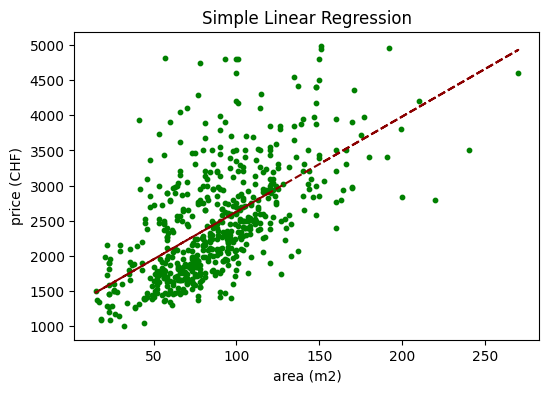

In [44]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')

plt.show()

#### price per m2 and area

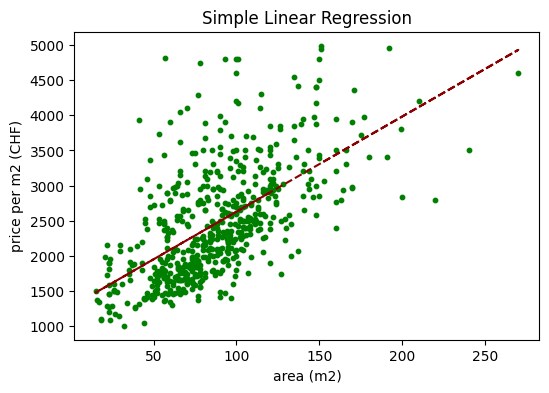

In [45]:
# Function to calculate model predictions
def myfunc(x):
    return priceperslope * x + priceperintercept

# Apply myfunc() to x, i.e. make predictions 
pricepermymodel = pd.Series(map(myfunc, priceperX_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(priceperX_train, y_train, s=10, color='green')
plt.plot(priceperX_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price per m2 (CHF)')

plt.show()

#### price per m2 and rooms

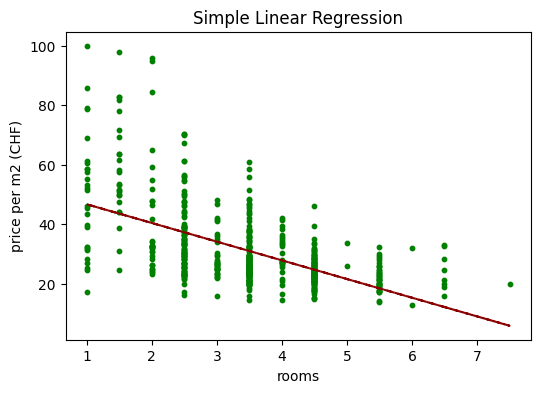

In [46]:
# Function to calculate model predictions
def myfunc(x):
    return roomsslope * x + roomsintercept

# Apply myfunc() to x, i.e. make predictions 
roomsmymodel = pd.Series(map(myfunc, roomsX_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(roomsX_train, roomsy_train, s=10, color='green')
plt.plot(roomsX_train, roomsmymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('rooms')
plt.ylabel('price per m2 (CHF)')

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [47]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 2898.72
1st Observed price in dataset: 1441.00
1st Residual price in dataset: -1457.72


#### price per m2 and area

In [48]:
# Calculate model residuals for train data
priceperresiduals = pricepery_train - pricepermymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {pricepermymodel[0]:.2f}')
print(f'1st Observed price in dataset: {pricepery_train[0]:.2f}')
print(f'1st Residual price in dataset: {priceperresiduals[0]:.2f}')

1st Predicted price in dataset: 24.05
1st Observed price in dataset: 29.41
1st Residual price in dataset: 5.36


#### price per m2 and rooms

In [49]:
# Calculate model residuals for train data
roomsresiduals = roomsy_train - roomsmymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {roomsmymodel[0]:.2f}')
print(f'1st Observed price in dataset: {roomsy_train[0]:.2f}')
print(f'1st Residual price in dataset: {roomsresiduals[0]:.2f}')

1st Predicted price in dataset: 12.13
1st Observed price in dataset: 29.41
1st Residual price in dataset: 17.28


### Plot histogram of residuals

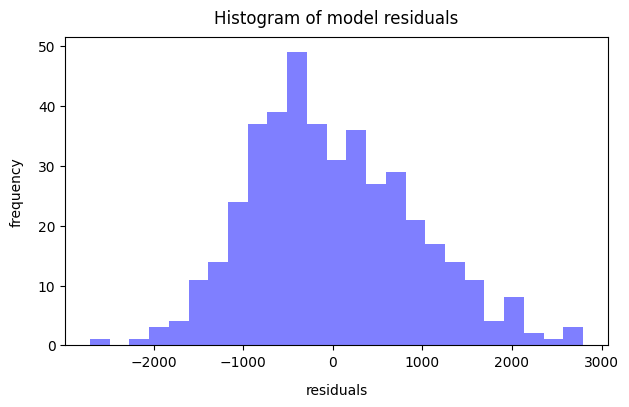

In [50]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

#### price per m2 and area

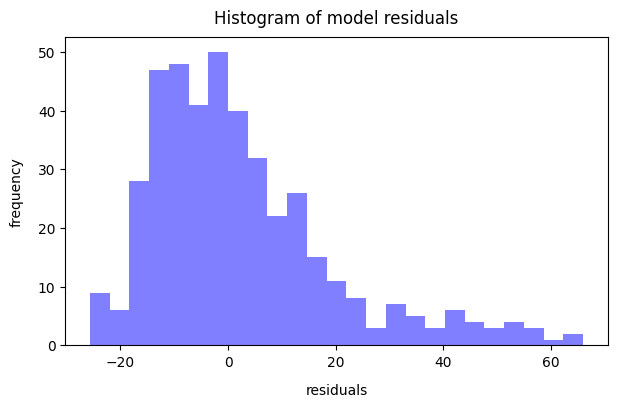

In [51]:
# Plot histogram of residuals
priceperfig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=priceperresiduals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

The Residuals for price per m2 and area are not normaly distributed

#### price per m2 and rooms

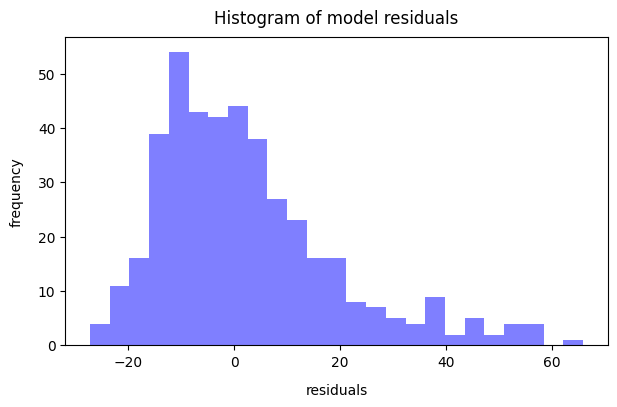

In [52]:
# Plot histogram of residuals
roomsfig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=roomsresiduals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

The Residuals for price per m2 and rooms are not normaly distributed

### Compare the observed prices with the predicted prices

In [53]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: -298.8
Observed price: 1640.0, Predicted price: -286.3
Observed price: 1568.0, Predicted price: -361.6
Observed price: 2290.0, Predicted price: -380.5
Observed price: 4950.0, Predicted price: -575.2
Observed price: 1787.0, Predicted price: -399.3
Observed price: 3495.0, Predicted price: -525.0
Observed price: 2450.0, Predicted price: -298.8
Observed price: 3390.0, Predicted price: -688.3
Observed price: 2836.0, Predicted price: -550.1


## Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [54]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area',
                                                            'pop_dens',
                                                            'mean_taxable_income',
                                                            'dist_supermarket']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area     pop_dens  mean_taxable_income  dist_supermarket
503   120   165.018625          65380.98802       1958.318650
6      65   525.662252         111422.35870        282.095910
400    90   424.146342          72133.75058       2606.231069
644    63  1044.628957          70964.08794        564.607066
484    91   399.525129          62000.54187        646.823905 

y2_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [55]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          6.98e-116
Time:                        12:36:54   Log-Likelihood:                -4403.2
No. Observations:                 577   AIC:                             8816.
Df Residuals:                     572   BIC:                             8838.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -386.2135    

### Interpretation of the relevant (in this course) statistics in the table above

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here. mean_taxable_income is statistically significant and dis_supermarket is statistically not significant > 0.05

### Plot histogram of residuals

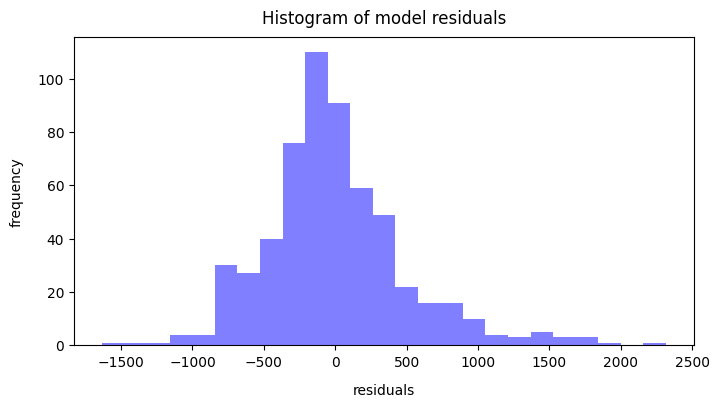

In [56]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

### Compare the observed prices with the predicted prices

In [57]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: 1660.8
Observed price: 1640.0, Predicted price: 1542.6
Observed price: 1568.0, Predicted price: 1808.3
Observed price: 2290.0, Predicted price: 2720.3
Observed price: 4950.0, Predicted price: 3321.1
Observed price: 1787.0, Predicted price: 2272.2
Observed price: 3495.0, Predicted price: 3121.7
Observed price: 2450.0, Predicted price: 2491.4
Observed price: 3390.0, Predicted price: 2736.0
Observed price: 2836.0, Predicted price: 2312.0


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [58]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-12-03 12:36:54
Python Version: 3.11.10
-----------------------------------
